# Item-Based Collaborative Filtering

As before, we'll start by importing the MovieLens 100K data set into a pandas DataFrame:

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)

ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


Now we'll pivot this table to construct a nice matrix of users and the movies they rated. NaN indicates missing data, or movies that a given user did not watch:

In [91]:
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# tillThereWasYou = userRatings["'Til There Was You (1997)"].dropna()
# print(tillThereWasYou)
# sns.set()
# sns.distplot(tillThereWasYou['user_id'])
# plt.show()

736 405
405
1.0    484
2.0     74
5.0     68
3.0     62
4.0     48
Name: count, dtype: int64


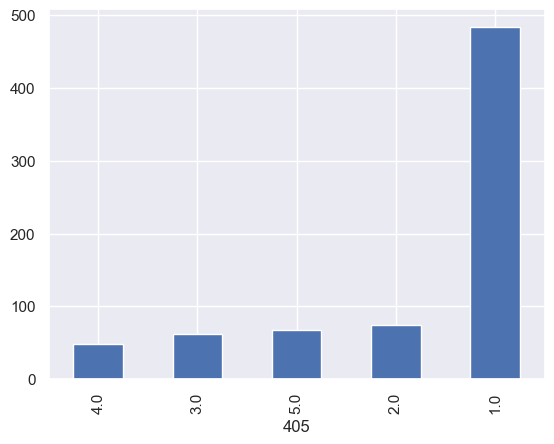

In [110]:
user_id = 0
nr_movies_rated = len(userRatings.loc[0].dropna())
for id in range(len(userRatings)):
    var = len(userRatings.loc[id].dropna())
    # print("id = ", id, ", var = ", var)
    if var > nr_movies_rated:
        nr_movies_rated = var
        user_id = id
print(nr_movies_rated, user_id)
ratingsForUser = userRatings.loc[user_id].dropna()
print(ratingsForUser.value_counts())
sns.set()
ratingsForUser.value_counts().sort_values().plot(kind='bar')
plt.show()

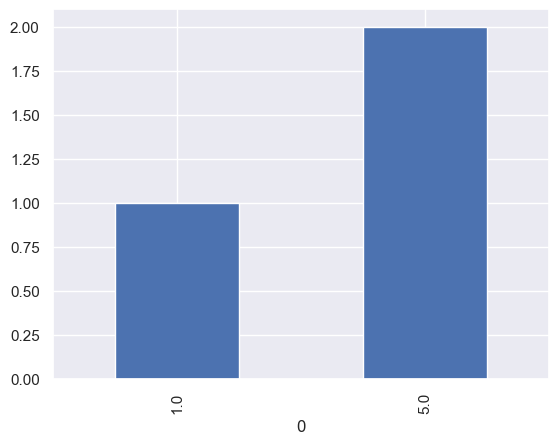

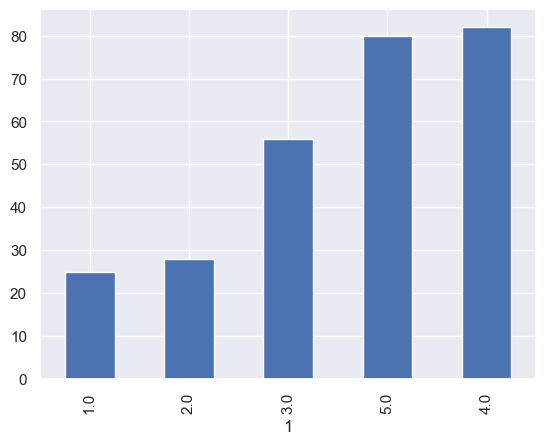

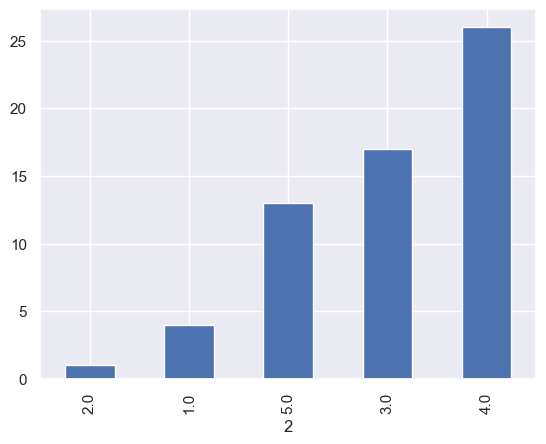

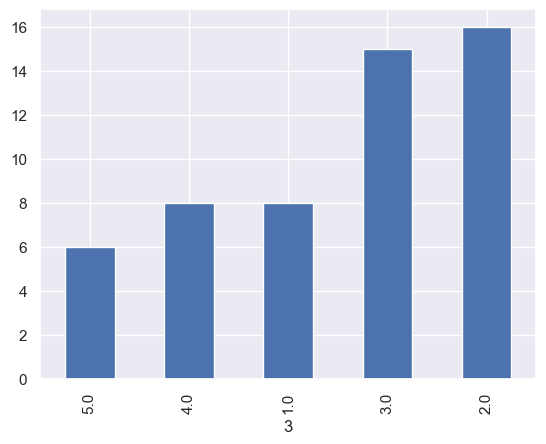

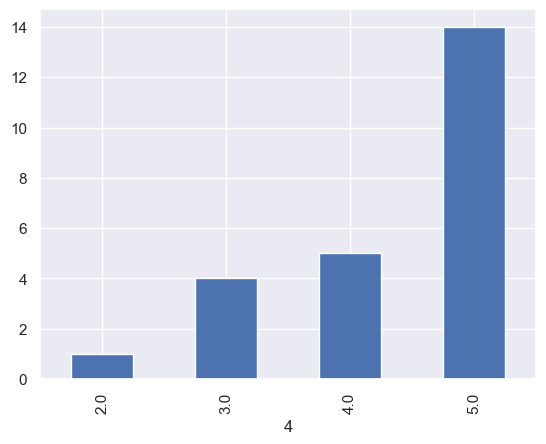

In [112]:
for id in range(len(userRatings)):
    if id == 5:
        break;
    ratingsForUser = userRatings.loc[id].dropna()
    ratingsForUser.value_counts().sort_values().plot(kind='bar')
    plt.show()

Now the magic happens - pandas has a built-in corr() method that will compute a correlation score for every column pair in the matrix! This gives us a correlation score between every pair of movies (where at least one user rated both movies - otherwise NaN's will show up.) That's amazing!

In [76]:
corrMatrix = userRatings.corr()
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,-4.875600e-17,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,1.443376e-01,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,4.753271e-01,NaN,NaN,NaN


However, we want to avoid spurious results that happened from just a handful of users that happened to rate the same pair of movies. In order to restrict our results to movies that lots of people rated together - and also give us more popular results that are more easily recongnizable - we'll use the min_periods argument to throw out results where fewer than 100 users rated a given movie pair:

In [77]:
corrMatrix = userRatings.corr(method='pearson', min_periods=300)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's produce some movie recommendations for user ID 0, who I manually added to the data set as a test case. This guy really likes Star Wars and The Empire Strikes Back, but hated Gone with the Wind. I'll extract his ratings from the userRatings DataFrame, and use dropna() to get rid of missing data (leaving me only with a Series of the movies I actually rated:)

In [78]:
# print(userRatings.loc[0])
myRatings = userRatings.loc[0].dropna()
myRatings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

Now, let's go through each movie I rated one at a time, and build up a list of possible recommendations based on the movies similar to the ones I rated.

So for each movie I rated, I'll retrieve the list of similar movies from our correlation matrix. I'll then scale those correlation scores by how well I rated the movie they are similar to, so movies similar to ones I liked count more than movies similar to ones I hated:

In [79]:
simCandidates = pd.Series()
# print(myRatings.index)
# print(myRatings[0], "\n\n\n")
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # print(sims, "\n\n\n", sims[0])
    # print(sims[0])
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: x * myRatings[i])
    # print(sims)
    # Add the score to the list of similarity candidates
    simCandidates = pd.concat([simCandidates, sims])
    
#Glance at our results so far:
print ("sorting...")
# print(simCandidates)
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Empire Strikes Back, The (1980)              5.000000
Star Wars (1977)                             5.000000
Star Wars (1977)                             3.741763
Empire Strikes Back, The (1980)              3.741763
Return of the Jedi (1983)                    3.606146
Return of the Jedi (1983)                    3.362779
Raiders of the Lost Ark (1981)               2.693297
Raiders of the Lost Ark (1981)               2.680586
Indiana Jones and the Last Crusade (1989)    1.750535
Back to the Future (1985)                    1.374196
dtype: float64


/var/folders/cd/nb9gspdn5hn_h2mv00dqs8nm0000gq/T/ipykernel_29456/285260250.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sims = sims.map(lambda x: x * myRatings[i])
/var/folders/cd/nb9gspdn5hn_h2mv00dqs8nm0000gq/T/ipykernel_29456/285260250.py:14: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  simCandidates = pd.concat([simCandidates, sims])
/var/folders/cd/nb9gspdn5hn_h2mv00dqs8nm0000gq/T/ipykernel_29456/285260250.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

This is starting to look like something useful! Note that some of the same movies came up more than once, because they were similar to more than one movie I rated. We'll use groupby() to add together the scores from movies that show up more than once, so they'll count more:

In [80]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()

In [81]:
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(20)

Empire Strikes Back, The (1980)              8.741763
Star Wars (1977)                             8.741763
Return of the Jedi (1983)                    6.968925
Raiders of the Lost Ark (1981)               5.373883
Indiana Jones and the Last Crusade (1989)    1.750535
Back to the Future (1985)                    1.374196
Star Trek: First Contact (1996)              1.277646
Independence Day (ID4) (1996)                1.243770
Godfather, The (1972)                        0.948875
Toy Story (1995)                             0.900099
Twelve Monkeys (1995)                        0.777652
Liar Liar (1997)                             0.751459
Contact (1997)                               0.674810
Rock, The (1996)                             0.239686
Fargo (1996)                                 0.222073
Silence of the Lambs, The (1991)             0.197439
Pulp Fiction (1994)                         -0.107838
dtype: float64

The last thing we have to do is filter out movies I've already rated, as recommending a movie I've already watched isn't helpful:

In [82]:
# filteredSims = simCandidates.drop(myRatings.index)
# filteredSims.head()

There we have it!

## Exercise

Can you improve on these results? Perhaps a different method or min_periods value on the correlation computation would produce more interesting results.

Also, it looks like some movies similar to Gone with the Wind - which I hated - made it through to the final list of recommendations. Perhaps movies similar to ones the user rated poorly should actually be penalized, instead of just scaled down?

There are also probably some outliers in the user rating data set - some users may have rated a huge amount of movies and have a disporportionate effect on the results. Go back to earlier lectures to learn how to identify these outliers, and see if removing them improves things.

For an even bigger project: we're evaluating the result qualitatively here, but we could actually apply train/test and measure our ability to predict user ratings for movies they've already watched. Whether that's actually a measure of a "good" recommendation is debatable, though!